In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import datapane


In [4]:
article = pd.read_csv("C:/msys64/home/for/10th/project_cusmos/hm_dataset/h&m dataset/articles_hm.csv") # articles_hm 상품
customer = pd.read_csv("C:/msys64/home/for/10th/project_cusmos/hm_dataset/h&m dataset/customer_hm.csv") # customer_hm 고객
transaction = pd.read_csv("C:/msys64/home/for/10th/project_cusmos/hm_dataset/h&m dataset/transactions_hm.csv") # transactions_hm 거래



transaction.isnull().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [5]:
# article.isnull().sum() # 제품 상세설명 null : 416

In [6]:
TRnCU = transaction.merge(customer, on = 'customer_id', how = 'inner') #거래, 고객 inner join
All = TRnCU.merge(article, on = 'article_id', how = 'inner') # 거래고객, 상품 inner join

All.isnull().sum() # 모두 조인한 csv의 결측치

t_dat                              0
customer_id                        0
article_id                         0
price                              0
sales_channel_id                   0
FN                                 0
Active                             0
club_member_status                 0
fashion_news_frequency             0
age                                0
product_code                       0
prod_name                          0
product_type_no                    0
product_type_name                  0
product_group_name                 0
graphical_appearance_no            0
graphical_appearance_name          0
colour_group_code                  0
colour_group_name                  0
perceived_colour_value_id          0
perceived_colour_value_name        0
perceived_colour_master_id         0
perceived_colour_master_name       0
department_no                      0
department_name                    0
index_code                         0
index_name                         0
i

In [7]:
# channel_sales = All.groupby("sales_channel_id")["price"].sum()
# channel_sales.plot(kind="bar", title = "sales by chennel")
# plt.show()

# All["age_group"] = (All["age"] // 10) * 10
# age_sales = All.groupby("age_group")["price"].mean()
# age_sales.plot(kind="line", marker="o", title="Average Spending by age group")
# plt.show()


In [8]:
# customer

customer_id                    0
FN                             0
Active                         0
club_member_status             0
fashion_news_frequency         0
age                            0
t_dat                     695015
article_id                695015
price                     695015
sales_channel_id          695015
dtype: int64

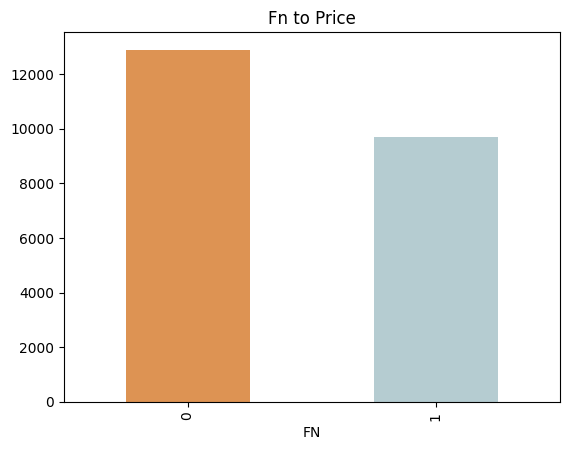

In [9]:
CnT = customer.merge(transaction, on = 'customer_id', how = 'inner')
fn_sales = CnT.groupby("FN")["price"].sum()  # 패션뉴스 구독률에 따른 매출량
# fn_sales = CnT.groupby("FN").count() # 행 개수
fn_sales.plot(kind = 'bar', color = ['#DD9353','#B5CCD1'], title = "Fn to Price")

CnT2 = customer.merge(transaction, on = 'customer_id', how = 'left')
CnT2.isnull().sum()

<Axes: xlabel='month'>

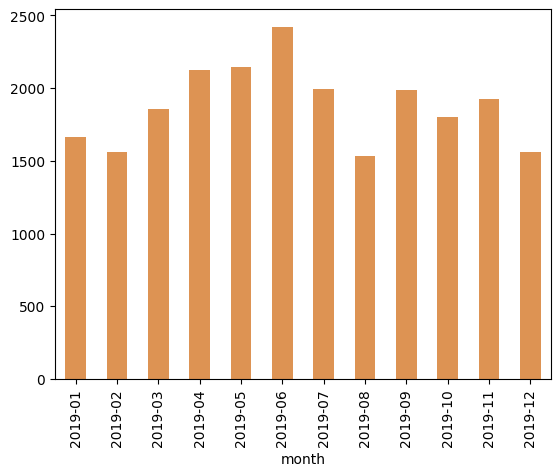

In [10]:
transaction["t_dat"] = pd.to_datetime(transaction["t_dat"]) # t_dat을 datetime타입으로 변환
transaction["month"] = transaction["t_dat"].dt.strftime("%Y-%m") #월별 컬럼 생성
CnT = customer.merge(transaction, on = 'customer_id', how = 'inner')


month_price = CnT.groupby("month")["price"].sum()
month_price.plot(kind = "bar", color = ['#DD9353']) #월별 매출

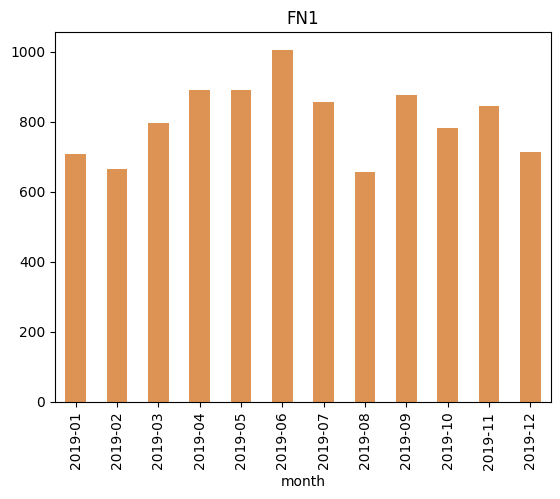

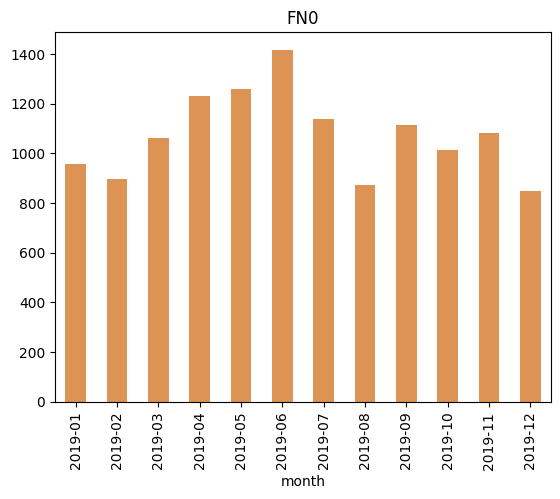

In [11]:
month_price_fn1 = (
    CnT.loc[CnT["FN"] == 1].groupby("month")["price"].sum()
)
month_price_fn1.plot(kind = "bar", color = ['#DD9353'], title = "FN1") # 월별 매출, FN이 1인 경우
plt.show()

month_price_fn0 = (
    CnT.loc[CnT["FN"] == 0].groupby("month")["price"].sum()
)
month_price_fn0.plot(kind = "bar", color = ['#DD9353'], title = "FN0")
plt.show()

<Axes: title={'center': 'month to fn to price'}, xlabel='month'>

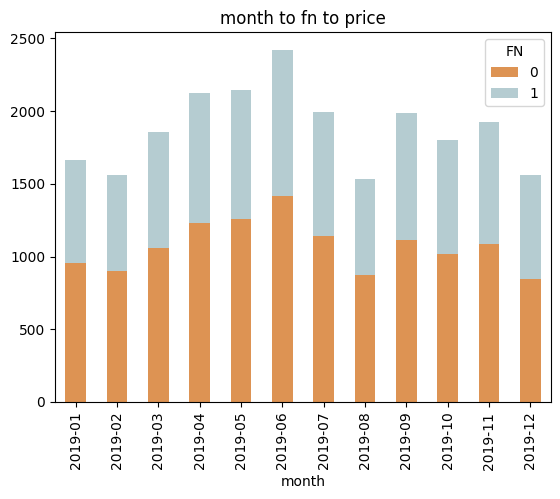

In [12]:
month_price_fn = (
    CnT.groupby(["month", "FN"])["price"].sum().unstack("FN", fill_value = 0)
)
month_price_fn.plot(kind = "bar", color = ['#DD9353','#B5CCD1'], stacked=True, title = "month to fn to price")

<Axes: title={'center': 'month to saleschannel to price'}, xlabel='month'>

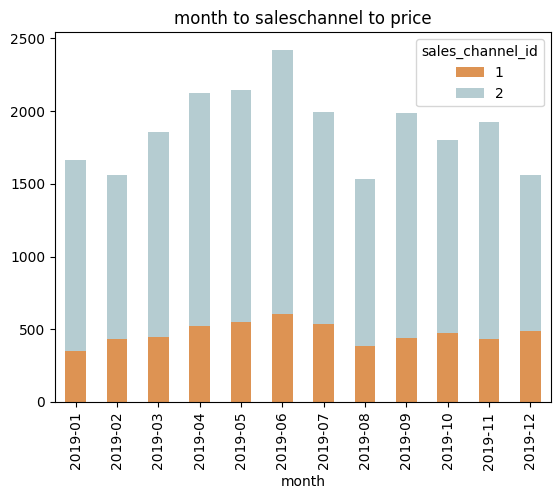

In [13]:
month_salescha = CnT.groupby(["month", "sales_channel_id"])["price"].sum()

month_sale_df = (
    month_salescha.unstack("sales_channel_id", fill_value=0).sort_index() # fill_value는 결측치를 채울 값
)
month_sale_df.plot(kind = "bar", color = ['#DD9353','#B5CCD1'], stacked = True, title = "month to saleschannel to price")

Text(0.5, 1.0, 'maybe special price? : expensive purchase == M.10~12')

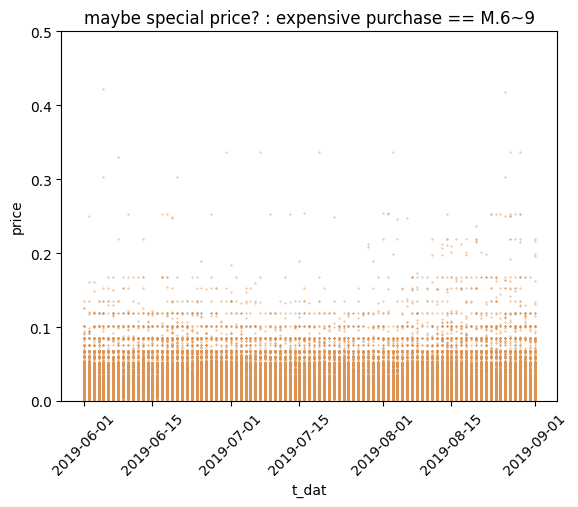

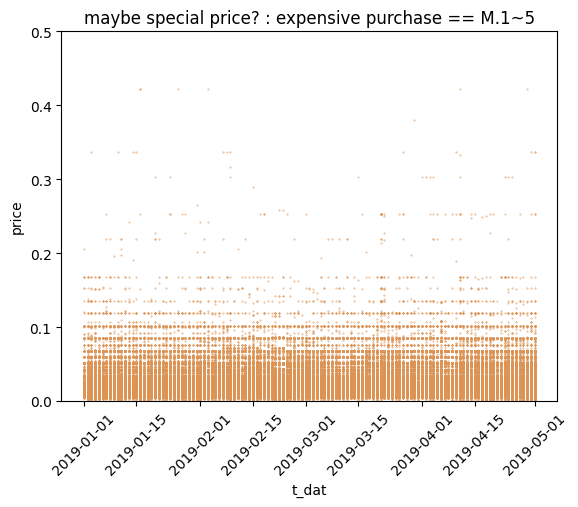

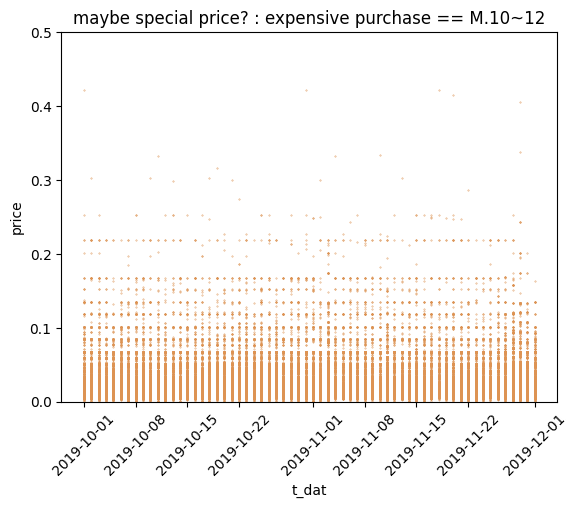

In [14]:
## 특별히 비싼 물품을 구매했는가? : 1~5, 6~9, 10~12

mask1 = (CnT["t_dat"] >= "2019-06") & (CnT["t_dat"] <= "2019-09")
CnT_3m = CnT.loc[mask1].copy()

mask2 = (CnT["t_dat"] >= "2019-01") & (CnT["t_dat"] <= "2019-05")
CnT_6m = CnT.loc[mask2].copy()

mask3 = (CnT["t_dat"] >= "2019-10") & (CnT["t_dat"] <= "2019-12")
CnT_9m = CnT.loc[mask3].copy()

# 
CnT_3m.plot.scatter(
    x = "t_dat", y = "price", s = 0.1, color = ['#DD9353']
)
plt.xticks(rotation = 45)
plt.ylim(0, 0.5)
plt.title("maybe special price? : expensive purchase == M.6~9")


CnT_6m.plot.scatter(
    x = "t_dat", y = "price", s = 0.1, color = ['#DD9353']
)
plt.xticks(rotation = 45)
plt.ylim(0, 0.5)
plt.title("maybe special price? : expensive purchase == M.1~5")

CnT_9m.plot.scatter(
    x = "t_dat", y = "price", s = 0.1, color = ['#DD9353']
)
plt.xticks(rotation = 45)
plt.ylim(0, 0.5)
plt.title("maybe special price? : expensive purchase == M.10~12")


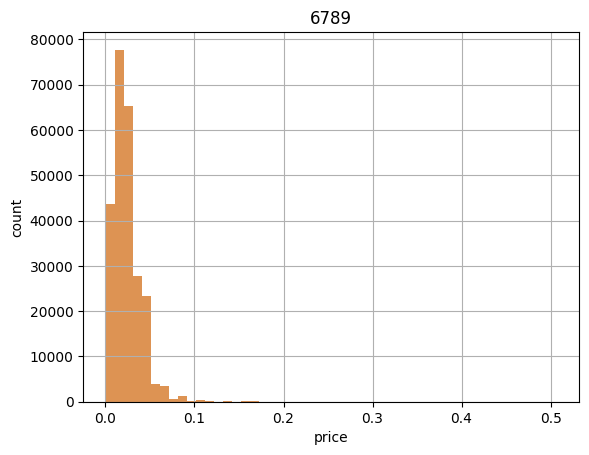

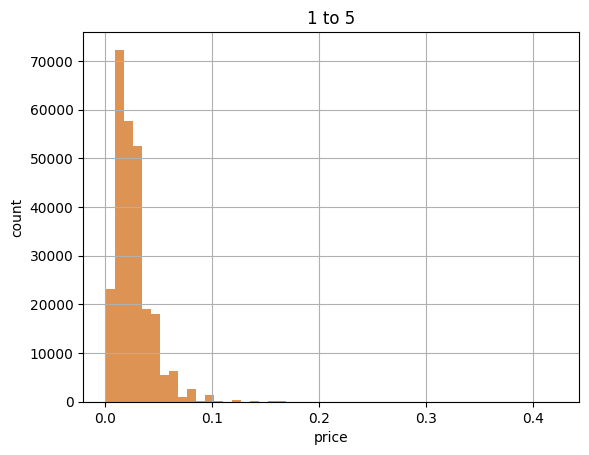

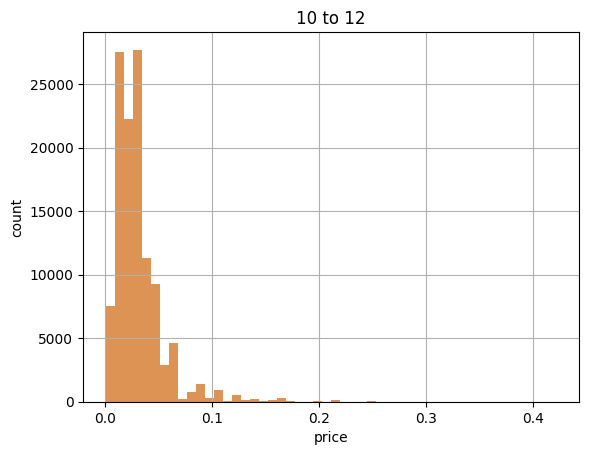

In [15]:
## 그렇다면 많이 구매했는가? : 1~5, 6~9, 10~12 

CnT_3m["price"].hist(bins = 50, color = ['#DD9353'])
plt.xlabel("price")
plt.ylabel("count")
plt.title("6789")
plt.show()

CnT_6m["price"].hist(bins = 50, color = ['#DD9353'])
plt.xlabel("price")
plt.ylabel("count")
plt.title("1 to 5")
plt.show()

CnT_9m["price"].hist(bins = 50, color = ['#DD9353'])
plt.xlabel("price")
plt.ylabel("count")
plt.title("10 to 12")
plt.show()

In [16]:
# TnA = transaction.merge(article, on = "article_id", how = "inner")
# TnA["t_dat"] = pd.to_datetime(transaction["t_dat"])
# TnA["month"] = transaction["t_dat"].dt.strftime("%Y-%m") # TnA["t_dat"].info

# vip = TnA.groupby("customer_id")["price"].sum().plot(kind = "bar")


In [19]:
TnA = transaction.merge(article, on = "article_id", how = "inner")
T = TnA.groupby('customer_id')['price'].sum().reset_index().sort_values(by = 'price',ascending = False)
T

,customer_id,price
340401,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,2.012712
6887,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,1.844746
428809,efaafb08a00e63ce561a67c31c1ab7e720d4f394a78c47...,1.740424
299300,a728b385ebbb4b2da7b5f5d4d945e411117462ac413c44...,1.733153
323729,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,1.675508
...,...,...
245655,89461466d84f78e574d76fd4536104f1cf8a4fdc09e5d4...,0.000424
380001,d40f21147b5c940fdb65cf532f58d54ea02f327dd24f65...,0.000424
88696,316de829c89fefa95b3961d12f3daaf857b0b825d1f55d...,0.000424
442331,f7262f4cebfb27469dd99b18e5df99cc9331c3c493f5ed...,0.000424


In [34]:
vip1 = T.head(1000)
vip1

,customer_id,price
340401,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,2.012712
6887,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,1.844746
428809,efaafb08a00e63ce561a67c31c1ab7e720d4f394a78c47...,1.740424
299300,a728b385ebbb4b2da7b5f5d4d945e411117462ac413c44...,1.733153
323729,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,1.675508
...,...,...
443981,f80664b3688637b73b7620ad3bf263fd6987b13da5ed6d...,0.565864
200807,701c70564d0bc13483355a55d4e07cc718c1759d45444a...,0.565847
185286,6779b54ada912c3cfdb3e66b073cb2e8b93c2e27f897d6...,0.565780
110203,3d8a10846ea385cf7b2b15af5736f922b231ff21041594...,0.565492


In [55]:
vip2 = transaction.merge(vip1, on = "customer_id", how = "left")
vip2

,t_dat,customer_id,article_id,price,sales_channel_id,month
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2,2019-11
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,2,2019-05
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,2,2019-05
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,682771001,0.033881,2,2019-08
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,1,2019-08
...,...,...,...,...,...,...
1048570,2019-03-25,8e900818a1da0e73300a012794615993fbefb43f851430...,766346001,0.025407,2,2019-03
1048571,2019-10-18,13aa106eeb8a6fa2f9e2ab888a3a2ee118a3900670f0d8...,811905001,0.016932,2,2019-10
1048572,2019-04-06,5f51e21397c1248aafdf9712435bd4be063eb093f56229...,690108001,0.021729,2,2019-04
1048573,2019-03-20,3421bd479ee13287a65660cf816b01d0d803d1d6d0fe73...,583534002,0.016932,2,2019-03


<Axes: xlabel='month'>

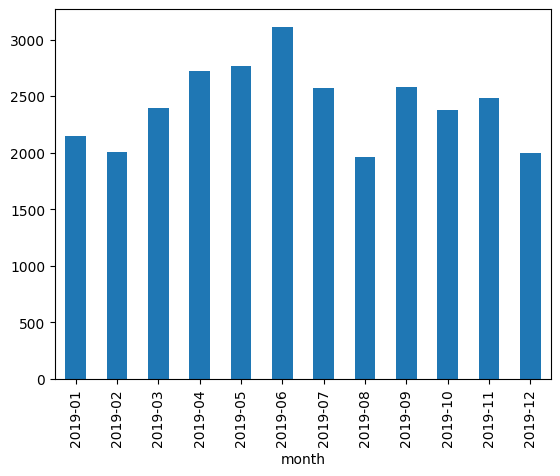

In [60]:
# transaction["t_dat"] = pd.to_datetime(transaction["t_dat"]) # t_dat을 datetime타입으로 변환
# transaction["month"] = transaction["t_dat"].dt.strftime("%Y-%m") #월별 컬럼 생성

# vip2["t_dat"].info()
# vip2["month"] = transaction["t_dat"].dt.strftime("%Y-%m")
vip2.groupby('month')['price'].sum().plot(kind = "bar")